<a href="https://colab.research.google.com/github/divyadeep1/BTP/blob/master/Neural%20Network%20-%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.text import *
import pandas as pd
import numpy as np
from google.colab import files
from google.colab import drive
from pathlib import Path
import gc

drive.mount('/content/gdrive/', force_remount=True)
root_dir = Path('/content/gdrive/My Drive/')
base_dir = root_dir/'Colab files/'

Mounted at /content/gdrive/


In [0]:
files.upload() #Upload kaggle.json (download from your kaggle account)

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyadeep1","key":"3bf6b7468fb1b13cd6d1795085302ddf"}'}

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d bittlingmayer/amazonreviews

 98% 485M/493M [00:09<00:00, 67.3MB/s]
100% 493M/493M [00:09<00:00, 54.4MB/s]


In [0]:
!unzip amazonreviews.zip

Archive:  amazonreviews.zip
  inflating: test.ft.txt.bz2         
  inflating: train.ft.txt.bz2        


In [0]:
!mkdir data
!bzip2 -d test.ft.txt.bz2
!bzip2 -d train.ft.txt.bz2

In [0]:
!cp test.ft.txt data/
!cp train.ft.txt data/
!ls data/

test.ft.txt  train.ft.txt


In [0]:
with open ('data/train.ft.txt', 'r') as f:
  print(f.readline())

__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^



In [0]:
train_file_lines = open('data/train.ft.txt').readlines()
test_file_lines = open('data/test.ft.txt').readlines()

In [0]:
len(train_file_lines)

3600000

In [0]:
train_sentences = [x.split(" ",1)[1] for x in train_file_lines]
train_labels = [0 if x.split(" ",1)[0]=='__label__1' else 1 for x in train_file_lines]

test_sentences = [x.split(" ",1)[1] for x in test_file_lines]
test_labels = [0 if x.split(" ",1)[0]=='__label__1' else 1 for x in test_file_lines]

In [0]:
len(train_sentences)

3600000

In [0]:
data_trn = pd.DataFrame({'text' : train_sentences, 'target' : train_labels})
data_tst = pd.DataFrame({'text' : test_sentences, 'target' : test_labels})

In [0]:
data_trn.shape

(3600000, 2)

In [0]:
data_tst.head()

,target,text
0,1,Great CD: My lovely Pat has one of the GREAT v...
1,1,One of the best game music soundtracks - for a...
2,0,Batteries died within a year ...: I bought thi...
3,1,"works fine, but Maha Energy is better: Check o..."
4,1,Great for the non-audiophile: Reviewed quite a...


In [0]:
del train_file_lines, test_file_lines

In [0]:
gc.collect()

0

In [0]:
data_trn.to_csv("data/train.csv", index=False)
data_tst.to_csv("data/test.csv", index=False)

In [0]:
!cp data/train.csv /content/gdrive/My\ Drive/Colab\ files/
!cp data/test.csv /content/gdrive/My\ Drive/Colab\ files/
!ls /content/gdrive/My\ Drive/Colab\ files/


lm-1e.pth  lm-4e.pth  test.csv	tmp.pth  train.csv


In [0]:
!ls data/

test.csv  test.ft.txt  train.csv  train.ft.txt


In [0]:
#files.download("data/train.csv") #Optional, for saving the files to your computer

In [0]:
#files.download("data/test.csv") #Optional

In [0]:
path = "/content/gdrive/My Drive/Colab files/"

In [0]:
#For resuming work if crash occurs, start here by reading the saved csv files.
data_trn = pd.read_csv(base_dir/'train.csv')
data_tst = pd.read_csv(base_dir/"test.csv")

In [0]:
number_of_train_samples = 70000 #out of 3.4M
number_of_test_samples = 30000 #out of 0.6M

Note - 750000/250000 combination of train/test data takes up only ~6GB RAM and ~20minutes.
Estimate - Can try with 1.5M/0.5M combination.

Note2 - That combination will take >3 hours for training one cycle. Trying with 70000/30000 dataset.

In [0]:
data_trn_min = data_trn.sample(n=number_of_train_samples, random_state=1)
data_tst_min = data_tst.sample(n=number_of_test_samples, random_state=1)

In [7]:
data_trn_min['target'].value_counts()

1    35043
0    34957
Name: target, dtype: int64

In [0]:
data_lm = TextLMDataBunch.from_df(path, train_df=data_trn_min, valid_df=data_tst_min)

In [0]:
data_lm.show_batch()

idx,text
0,", sentence completion , and oral reading . xxmaj parent participation is encouraged and a "" certificate of accomplishment "" is included at the end of the book xxmaj this book is excellent source material for both teachers and parents , but particularly for parents who wish to help their child at home with basic reading skills . \n xxbos xxmaj stay far , far away . : i"
1,"be the one . xxmaj this , like many opera dvds , was not a recording produced exclusively for dvd , but rather , a dvd recording re - recorded onto vhs with added menus and special effects . xxmaj muti is an excellent conductor and the emotion sparkles in this production but my ears were left straining to hear the notes of xxmaj mozart 's beautiful opera . xxmaj"
2,"the ugliest sort : ugly xxmaj americans , thieving and conniving xxmaj brits , xxunk xxmaj french officers , amorphous xxmaj arab and xxmaj african stereotypes . xxmaj read and enjoy this if you are or like alcoholic and xxunk blue - bloods and enjoy suffering in yourself and others , because suffer you will as you read the painful travails of xxmaj kit , xxmaj port , xxmaj xxunk"
3,"far it seems to be working great . xxmaj the only problem i see is fitting the handle into the clip . xxmaj you have to push hard , i hope it wo n't break . \n xxbos xxmaj love this and such a great value ! : i chose this easel over others on the market because of the additional storage and wow am i glad i did"
4,"an enjoyable , informative , and must - read book . xxmaj truly paradigm shifting and highly recommended . \n xxbos xxmaj ack xxrep 4 . xxup i'm xxup melting : xxmaj ok , i 'll be honest , i did n't love this cd right away . i had to listen to it a couple of times - but oh baby , when it hits you , watch"


In [0]:
data_lm.save("data_lm_70000_30000.pkl")

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


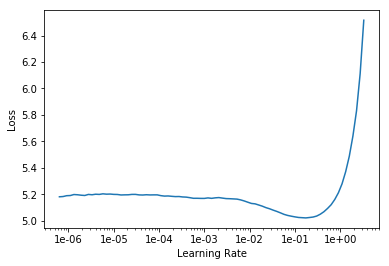

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.137004,3.955638,0.296601,21:52


Mounted at /content/gdrive/


In [0]:
learn.save("lm-1e")

In [0]:
base_dir = root_dir+'Colab files/'

In [0]:
!cp data/models/lm-4e.pth /content/gdrive/My\ Drive/Colab\ files/
!cp data/models/tmp.pth /content/gdrive/My\ Drive/Colab\ files/
!ls /content/gdrive/My\ Drive/Colab\ files/


lm-1e.pth  lm-4e.pth  tmp.pth


In [0]:
number_of_cycles = 3

In [0]:
learn.fit_one_cycle(number_of_cycles, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.132968,4.012256,0.290582,21:53
1,4.035947,3.950331,0.295904,21:53
2,3.882095,3.913302,0.300035,21:52


In [0]:
learn.save('lm-4e')

In [23]:
learn.load("lm-4e")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (70000 items)
x: LMTextList
xxbos xxmaj excellent home help for parents : xxmaj volume 1 of xxmaj dolch xxmaj sight xxmaj work xxmaj activities for grades xxup xxunk covers 110 of the xxmaj dolch basic sight words , along with additional words from the xxmaj dolch xxmaj xxunk xxmaj nouns xxmaj list . xxmaj each of the 25 units includes lessons in letter tracing , matching and visualization , scrambled words , missing letters , sentence completion , and oral reading . xxmaj parent participation is encouraged and a " certificate of accomplishment " is included at the end of the book xxmaj this book is excellent source material for both teachers and parents , but particularly for parents who wish to help their child at home with basic reading skills . 
 ,xxbos xxmaj stay far , far away . : i made it through about 6 , maybe 7 minutes of this truly horrendous tripe . i suppose the saddest thing to see was improv veteran xxmaj andrea xx

In [22]:
!ls /content/gdrive/My\ Drive/Colab\ files/models/

lm-1e.pth  lm-4e.pth  tmp.pth


In [24]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.061049,4.008903,0.291075,21:09
1,3.995048,3.955546,0.295808,21:08
2,3.816021,3.922731,0.299694,21:07


In [0]:
learn.save("lm-7e")

In [0]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.693713,3.844966,0.313154,23:32
1,3.620373,3.752861,0.322931,23:33
2,3.303982,3.722608,0.328092,23:32


In [0]:
learn.save("lm_328")

In [0]:
files.download("data/models/lm-3e.pth") #Optional. To save the language model to your system.

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 47852, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
learn.save_encoder('tuned')

In [0]:
data = TextClasDataBunch.from_df(path, train_df=data_trn_min, valid_df=data_tst_min)

In [0]:
nn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.5)
nn.load_encoder("tuned")

In [34]:
nn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


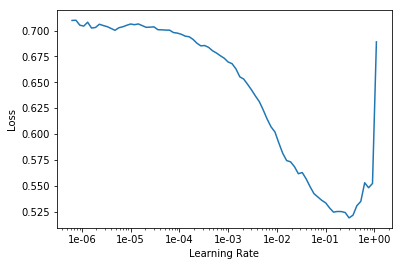

In [35]:
nn.recorder.plot()

In [0]:
number_of_cycles = 10

In [37]:
nn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.292915,0.202218,0.922333,06:47


In [0]:
nn.save("nn1")

In [0]:
nn.freeze_to(-2)

In [41]:
nn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.230386,0.165600,0.939667,08:05


In [0]:
nn.save("nn2-9396")

In [0]:
nn.freeze_to(-3)

In [45]:
nn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.187631,0.163410,0.941233,11:51


In [0]:
nn.save("nn3-9412")

In [48]:
nn.unfreeze()
nn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.184617,0.163181,0.941533,16:28
1,0.189899,0.159749,0.942933,16:21


In [0]:
nn.save("nn4-9429")

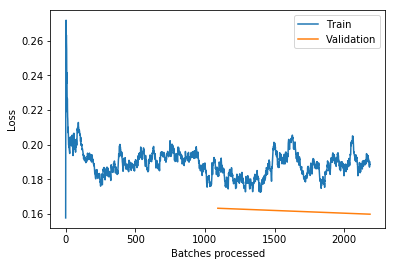

In [50]:
nn.recorder.plot_losses()

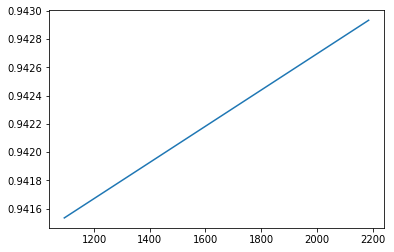

In [52]:
nn.recorder.plot_metrics()

In [0]:
nn.predict("""Chemistry is tough. Can't handle it anymore. Please save me.""")

(Category 0, tensor(0), tensor([0.7045, 0.2955]))